In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [5]:
title = "# Random variables and probability distributions"
# Print title and setup TeX defs for both KaTeX and MathJax
import bayesian_stats_course_tools
bayesian_stats_course_tools.misc.display_markdown_and_setup_tex(title)

import matplotlib.style
matplotlib.style.use("bayesian_stats_course_tools.light")

# Random variables and probability distributions

<!-- Define LaTeX macros -->
$\def\E{\operatorname{E}}$
$\def\Var{\operatorname{Var}}$
$\def\Cov{\operatorname{Cov}}$
$\def\dd{\mathrm{d}}$
$\def\ee{\mathrm{e}}$
$\def\Norm{\mathcal{N}}$
$\def\Uniform{\mathcal{U}}$

<!-- MathJax needs them to be defined again for the non-inline environment -->
$$\def\E{\operatorname{E}}$$
$$\def\Var{\operatorname{Var}}$$
$$\def\Cov{\operatorname{Cov}}$$
$$\def\dd{\mathrm{d}}$$
$$\def\ee{\mathrm{e}}$$
$$\def\Norm{\mathcal{N}}$$
$$\def\Uniform{\mathcal{U}}$$


Random variables (RVs) are functions of the outcomes. 

In the case of a throw of a fair die the outcomes are $\omega \in \Omega=\{1,2,3,4,5,6\}$. 
Examples of random variables $X: \Omega \rightarrow F$, $F$ a measureable space:
- $X=1$ if the thrown number is even, $X=0$ otherwise: 
$$
X(\omega) = \begin{cases}
    1 &\omega\in\{2,4,6\} \\
    0 &\omega\in\{1,3,5\}
\end{cases}
$$

- $X$ is a 3d unit vector pointing in the +x, -x, +y, -y, +z, -z directions: 
$$X(\omega) = \begin{cases}
    \vec e_x &\omega = 1 \\
    -\vec e_x &\omega = 2 \\
    \vec e_y &\omega = 3 \\
    \dots
\end{cases}$$
- $X$ is the outcome of the throw: $X(\omega) = \omega$


## Probability distributions

### Discrete random variables

If the random variable $X$ is discrete, the probability of $X$ taking the value $x$ is given by the probability mass function $p_X(x)$:
- $p_X(x) = \Pr(X = x)$
- $0 \leq p_X(x) \leq 1\ \forall x$
- $\sum_x p_X(x) = 1$


#### Example: binomial distribution

Consider an experiment that can have two outcomes: success and failure, with probability of success being $p$ and failure being $q=1-p$. 

The binomial distribution gives the probability of having success $k$ times in $n$ independent trials:

$$
\Pr(X=k) = \binom{n}{k}p^k(1-p)^{n-k}
$$
- Parameters:
    - $p$: probability of success
    - $n$: number of trials

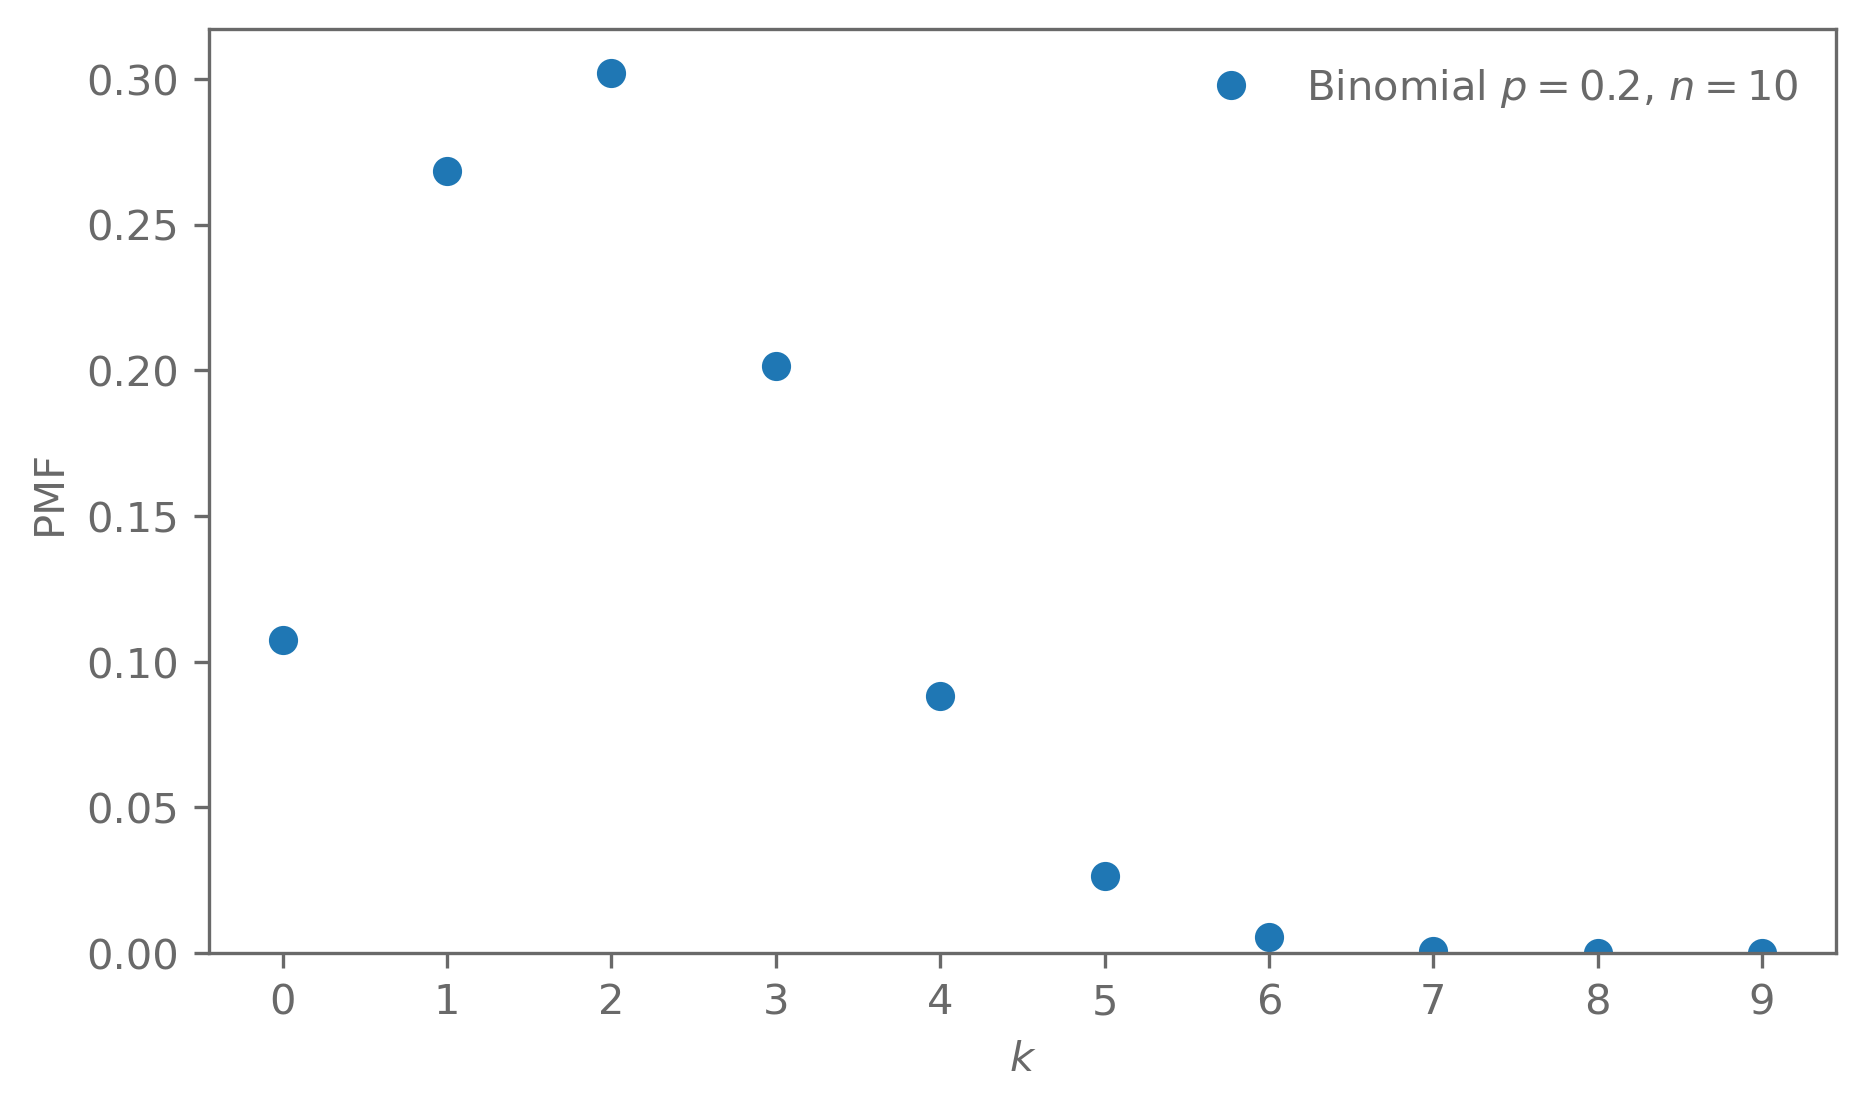

In [11]:
distr = scipy.stats.binom(p=0.2, n=10)
k = np.arange(10)
plt.plot(k, distr.pmf(k), "o", label="Binomial $p=0.2$, $n=10$")
plt.ylim(bottom=0)
plt.legend(frameon=False)
plt.xticks(k)
plt.ylabel("PMF")
plt.xlabel("$k$");

### Continuous random variables

For continuous $X$, the probability density function $f_X(x)\dd x$ is the probability of $x$ falling into the interval $[x,x+\dd x]$. 
More formally:
- $\Pr(a\leq X \leq b) = \int_a^b f_X(x)\dd x$
- $\int_{-\infty}^\infty f_X(x)\dd x = 1$
- $f_X(x) \geq 0\ \forall x$

Going forward, we will often abuse notation a bit and use $p$, such as $p(x)$, to refer to probabilities, probability density functions, probability distributions etc. From the context it is usually clear which random variable they refer to. If not, we will add the subscript for clarity.

#### Example: chi-squared distribution

The pdf of the chi-squared distribution with $\nu$ degrees of freedom is
$$
p(x) = \frac{1}{2^\frac{\nu}{2}\Gamma(\frac{\nu}{2})}x^{\frac{\nu}{2}-1}\ee^{-\frac{x}{2}}
$$
- Parameter:
    - $\nu$: number of degrees of freedom

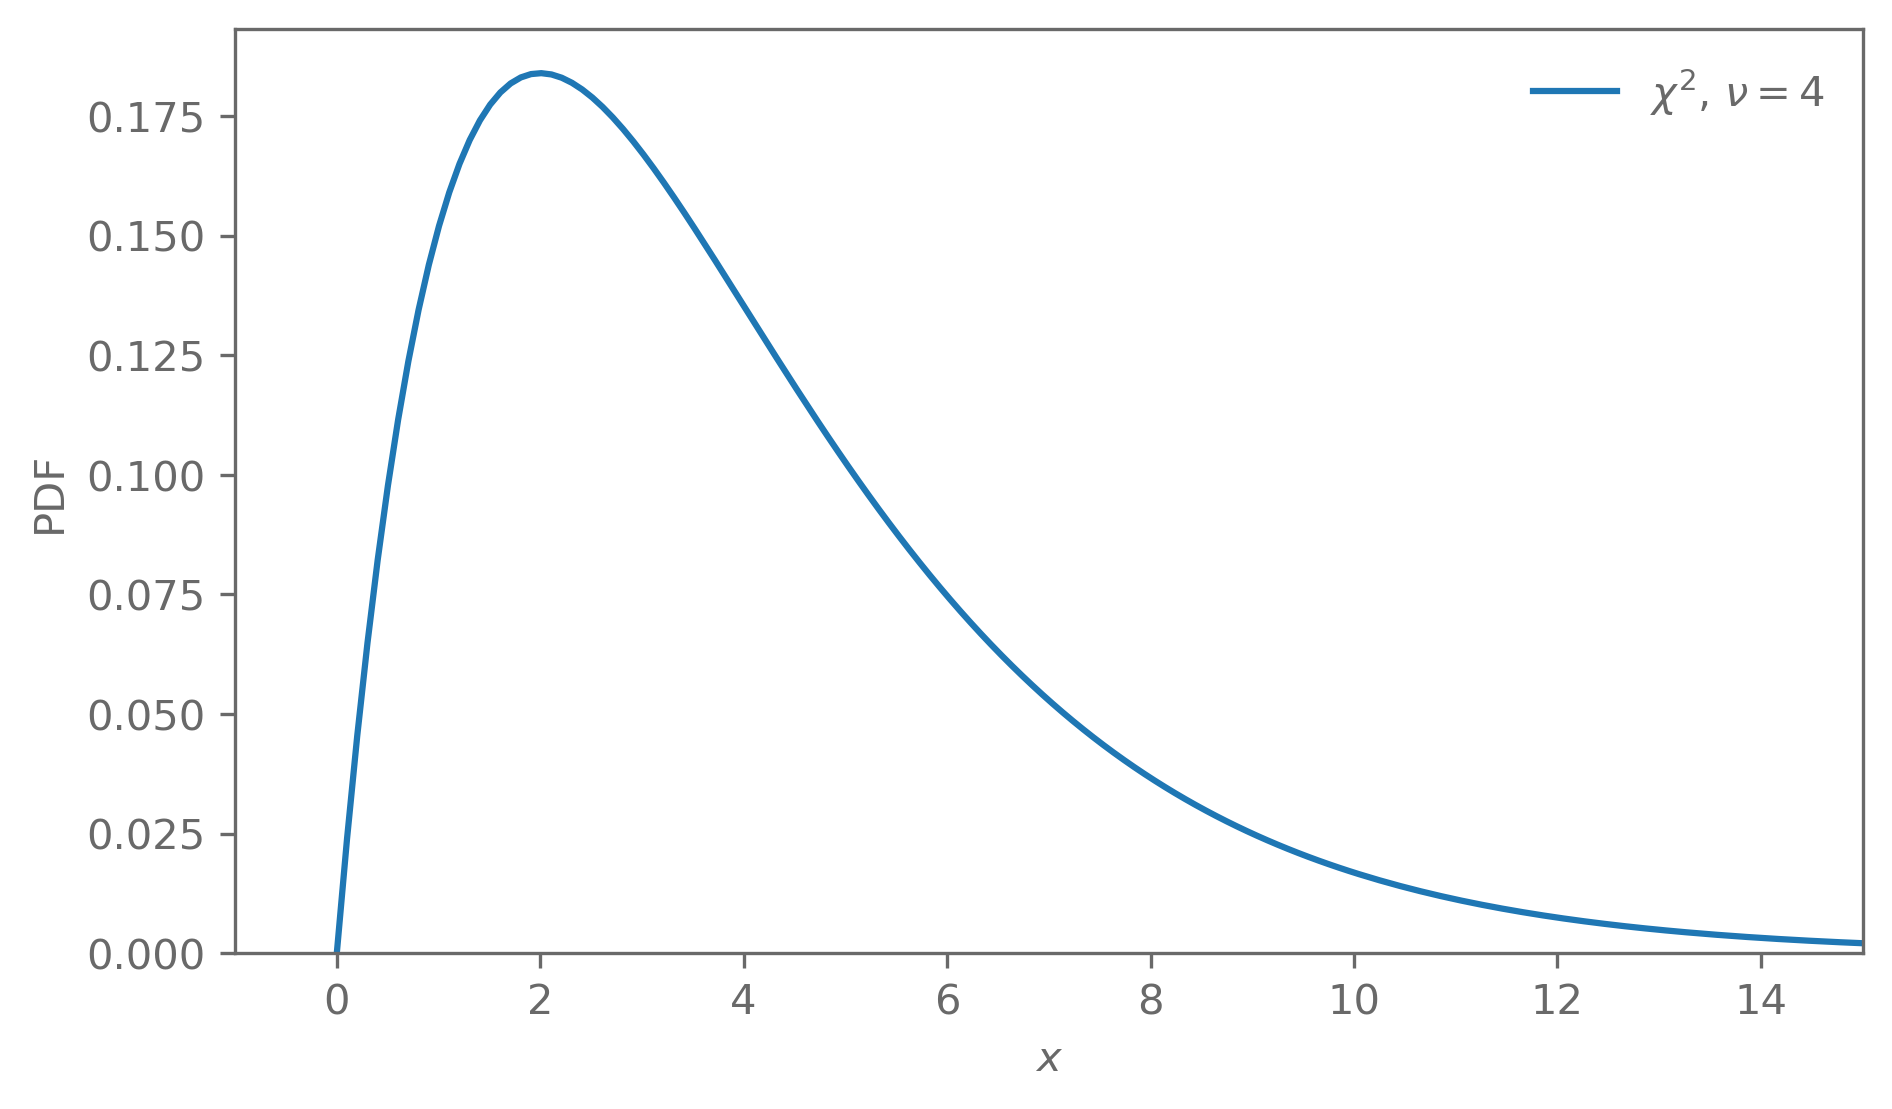

In [25]:
distr = scipy.stats.chi2(df=4)
x = np.linspace(0, 20, 200)
plt.plot(x, distr.pdf(x), label=r"$\chi^2$, $\nu=4$")
plt.ylim(bottom=0)
plt.xlim(right=15)
plt.legend(frameon=False)
# plt.xticks(k)
plt.ylabel("PDF")
plt.xlabel("$x$");

## Cumulative distribution function (CDF)

The cumulative distribution function (CDF) $F_X(x)$ is the probability of $X$ being at most $x$:

$\Pr(X \leq x) = F_X(x) = \int_{-\infty}^x f_X(x)\dd x$

The fundamental theorem of calculus gives the relationship between the probability density function and the cumulative distribution function:
- $f_X(x) = \frac{\dd }{\dd x}F_X(x)$
- $\Pr(a\leq X \leq b) = F_X(b) - F_X(a)$

Because $f_X(x) \geq 0$, it follows that $F_X(x)$ is monotonic.


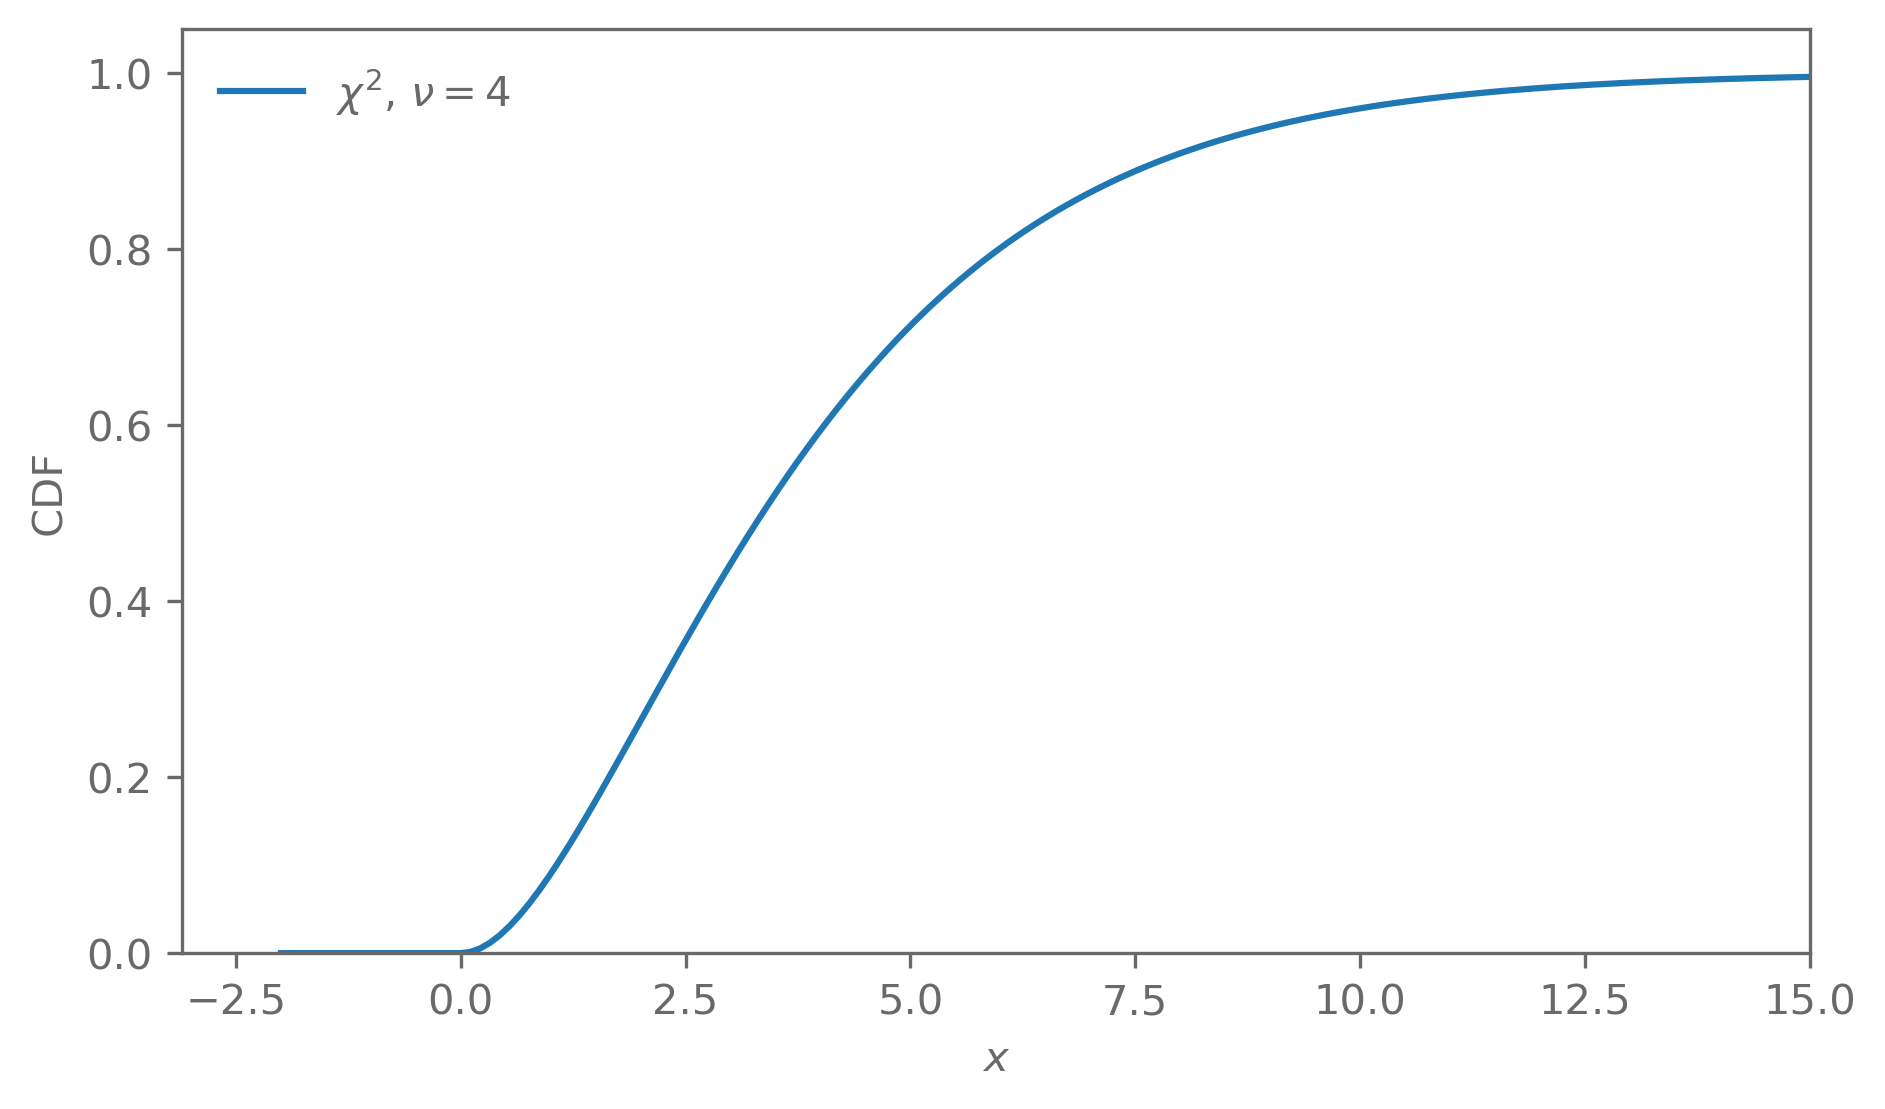

In [29]:
distr = scipy.stats.chi2(df=4)
x = np.linspace(-2, 20, 200)
plt.plot(x, distr.cdf(x), label=r"$\chi^2$, $\nu=4$")
plt.ylim(bottom=0)
plt.xlim(right=15)
plt.legend(frameon=False)
plt.ylabel("CDF")
plt.xlabel("$x$");

## Independent and identically distributed random variables

Often random variables are assumed to be independent and identically distributed (i.i.d.):
- They are mutually independent
- They are all drawn from the same probability distribution

Many theorems assume i.i.d random variables but real data often violate either or both of these assumptions!

## Change of variables

Let $g : \mathbb{R} \rightarrow \mathbb{R}$ be a monotonic function that maps the random variable $X$ to $Y$. 

What is the PDF $f_Y(y)$, $y=g(x)$ of $Y$?

The probability of $Y$ in a small interval $[y,y+\dd y]$ should be the same as that of $X$ in a small interval $[x,x+\dd x]$: $f_X(x)\dd x = f_Y(y) \dd y$

From this follows that
$$
    f_Y(y) = f_X(g^{-1}(y))\left|\frac{\dd}{\dd y}g^{-1}(y)\right|
$$

If $g$ is not monotonic,
$$
    f_Y(y) = \sum_i f_X(g_i^{-1}(y))\left|\frac{\dd}{\dd y}g_i^{-1}(y)\right| \ ,
$$
where $g_i^{-1}(y)$ are the solutions to $g(x)=y$ at $y$.
 


### Inverse transform sampling

An important application of the change of variables formula is inverse transform sampling:

Let $U\sim\Uniform(0,1)$ and $Y = g(U)$

\begin{align}
    f_U(u)\dd u &= f_Y(y)\dd y \\
    \int^u f_U(u')\dd u' &= \int^{y=g(u)} f_Y(y')\dd y' \\
    F_U(u) &= u = F_Y(y) \\
    y = g(u) &= F_Y^{-1}(u)
\end{align}

If we know the inverse of the CDF of $Y$, then we can sample from the distribution of $Y$.

$$y = F_Y^{-1}(u)$$

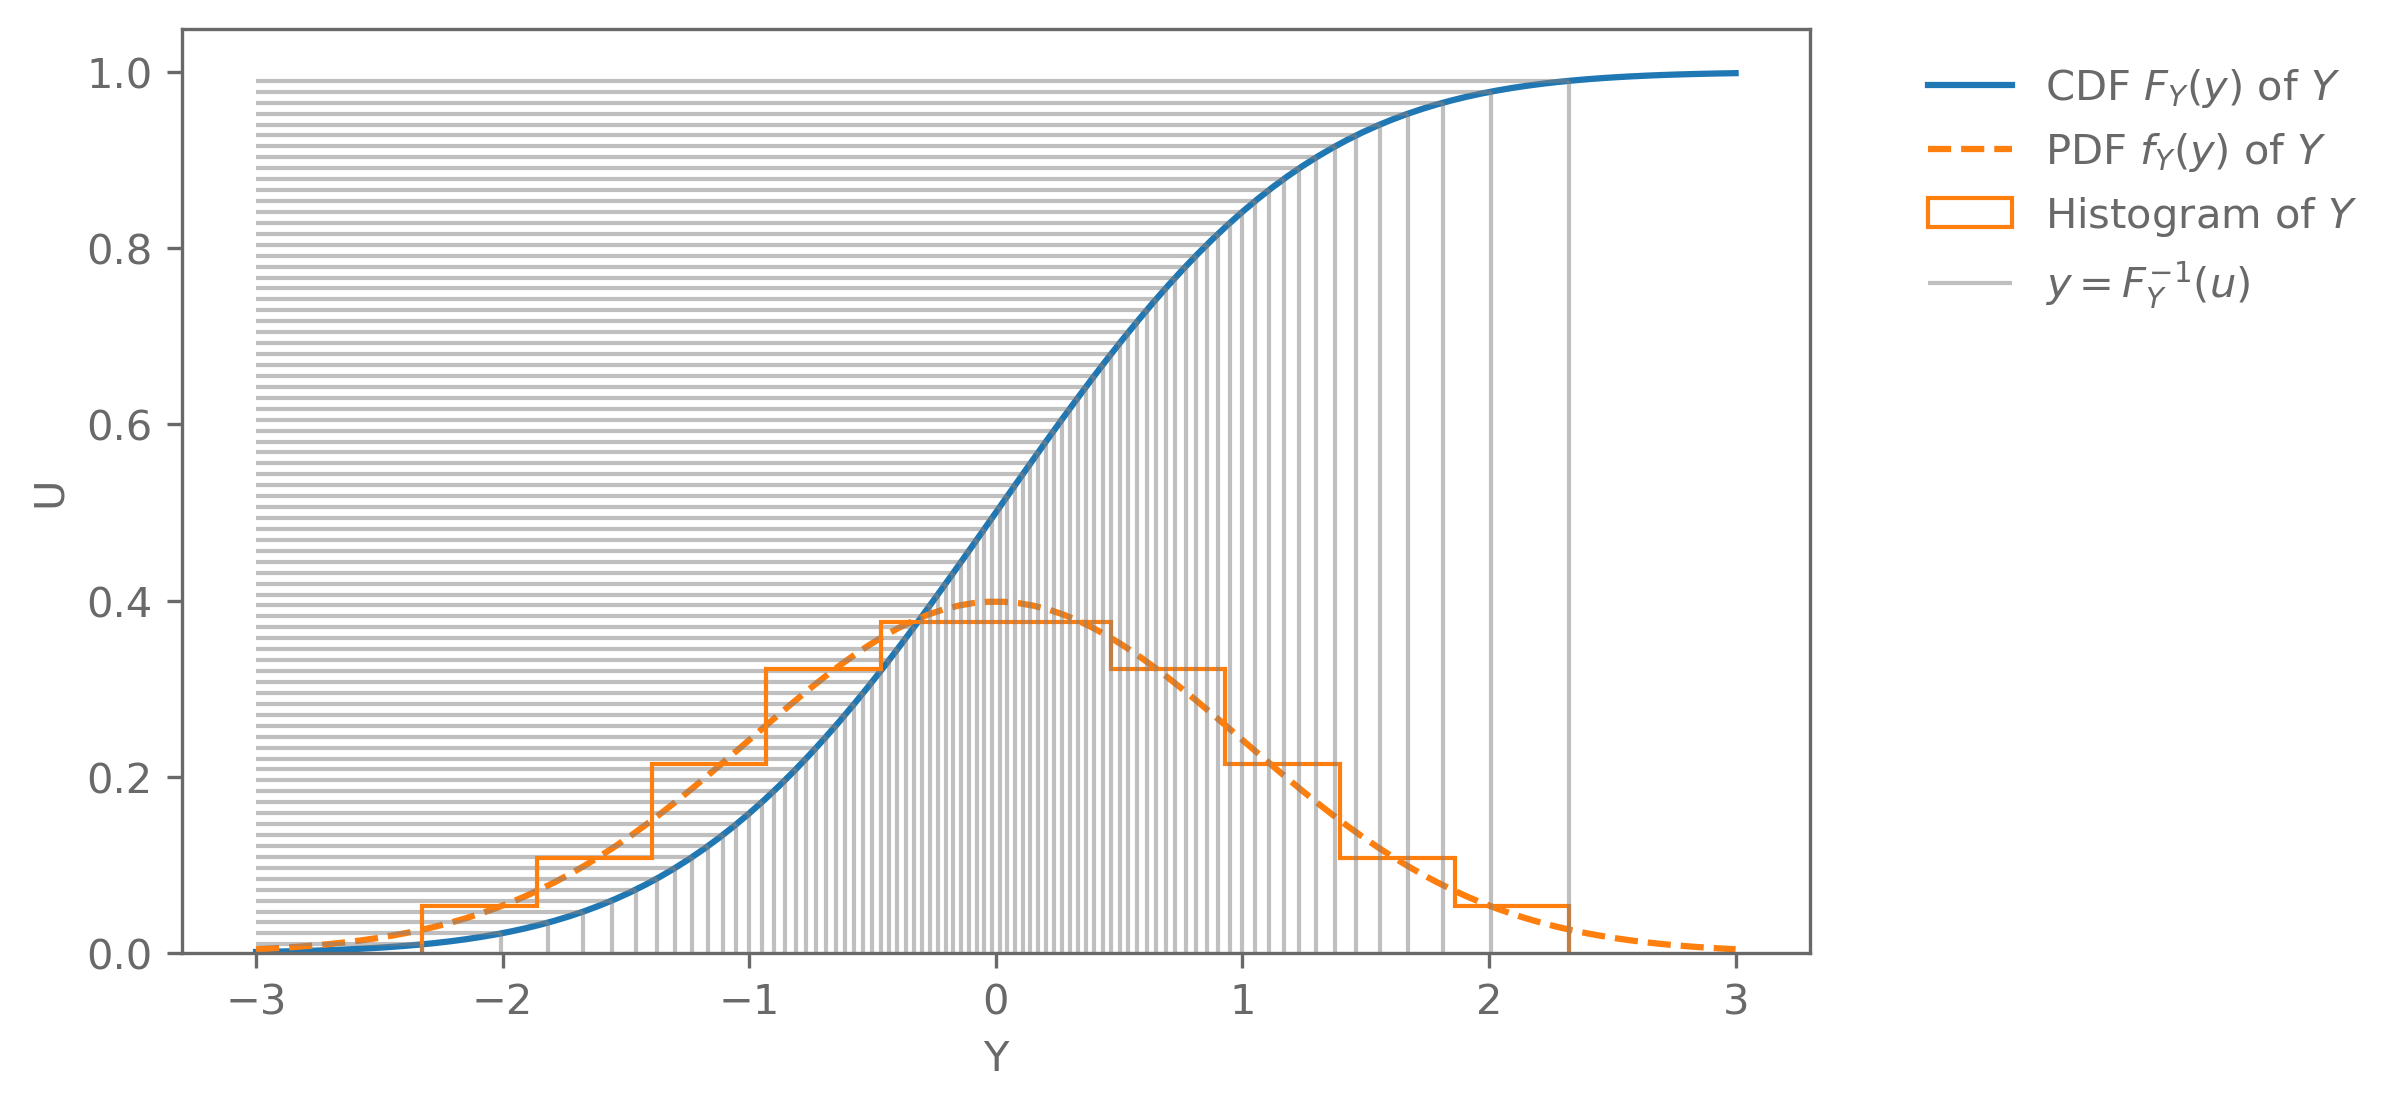

In [7]:
base_distr = scipy.stats.norm

u = np.linspace(0.01, 0.99, 80)
y = base_distr.ppf(u)

fig, ax = plt.subplots()

x = np.linspace(-3, 3, 100)
ax.plot(x, base_distr.cdf(x), label="CDF $F_Y(y)$ of $Y$", c="C0")
ax.plot(x, base_distr.pdf(x), label="PDF $f_Y(y)$ of $Y$", c="C1", ls="--")
ax.hlines(y=u, xmin=-3, xmax=y, lw=1, alpha=0.5, color="grey")
ax.hist(y, density=True, alpha=1.0, label="Histogram of $Y$", histtype="step", color="C1")
ax.vlines(x=y, ymin=0, ymax=u, lw=1, alpha=0.5, color="grey", label="$y = F_Y^{-1}(u)$")

ax.set_xlabel("Y")
ax.set_ylabel("U")
ax.legend(frameon=False, loc=2, bbox_to_anchor=(1.05, 1.))

fig.dpi = 300;

### Exercise

Sample from the distribution with PDF
$$
    p(x) = \begin{cases}
                0 & x < 0 \\
                \frac{1}{2}\sin x & \text{otherwise} \\
                0 & x > \pi
            \end{cases}
$$
- Plot the PDF and CDF
- Sample from the distribution using invere transform sampling
- Compare the histogram of the samples to the PDF


## Expectation

We usually want to know what values a random variable "typically" takes. There are many ways to define "typically" but a common one is the expectation, or mean, of the random variable $X$ with respect to its probability distribution $p_X(x)$:
\begin{equation}
    \E_{p_X(x)}[x] = \int_{-\infty}^\infty x\, p_X(x) \dd x
\end{equation}

We usually drop the subscripts if it is clear from context: $\E[x] = \int_{-\infty}^\infty x\, p(x) \dd x$

More generally, the expectation can be with respect to functions of random variables:

\begin{equation}
    \E[f(x)] = \int_{-\infty}^\infty f(x)\, p(x) \dd x
\end{equation}

We treat this as a definition but it is a consequence of the definition of the expectation and the change-of-variables formula.

### Mean and variance

Some of these functions are used often and have their own names:

Mean $\E[x]$, sometimes also written as $<x>$
- $f(x)=x$
- The value of the mean is often written as $\mu$: $\E[x] = \mu$
- For some constant $a$: $\E[x + a] = \mu + a$
- For some constant $c$: $\E[cx] = c\mu$

Variance $\Var[x]$
- $f(x) = (x - \E[x])^2$
- The value of the variance is often written as $\sigma^2$: $\Var[x] = \sigma^2$
- $\Var[x] = \E[(x - \E[x])^2] = \E[x^2] - \E[x]^2$
- For some constant $a$: $\Var[x + a] = \sigma^2$
- For some constant $c$: $\Var[cx] = c^2\sigma^2$

### Moments

More generally, the $n$-th (raw) moment is given by $\E[X^n]$.
- The first raw moment is the mean

The $n$-th central moment is given by $\E[(X-\mu)^n]$.
- The second central moment is the variance

The $n$-th standardised moment is given by $\E\left[\left(\frac{X-\mu}{\sigma}\right)^n\right]$.
- The 3rd standardised moment is called the skewness. The skewness is a measure of the asymmetry in a distribution
- The 4th standardised moment is called the kurtosis. The kurtosis measures how heavy the tails of a distribution are



### Mode

Often we are also interested in what value a random variable is most likely to take. 
This is given by the mode, which is location of the maximum of the distribution:

$$
x^* = \underset{x}{\mathrm{argmax}}\ p(x) \,.
$$

### Exercise

Show the expressions for the mean and variance.

## Joint distributions

The definitions so far were for univariate distributions but they can be generalised to joint distributions $f_{X_1,\dots X_n}(x_1,\dots,x_n)$ of multiple random variables:

\begin{equation}
    \Pr(X_1, \dots, X_n \in D) = \int_D f_{X_1,\dots X_n}(x_1,\dots,x_n)\dd x_1\dots \dd x_n
\end{equation}

And similarly for the CDF:

\begin{equation}
    \begin{split}
        F_{X_1,\dots X_n}(x_1,\dots,x_n) &= \Pr(X_1\leq x_1, \dots, X_n\leq x_n) \\
        &= \int_{-\infty}^{x_1}\dots \int_{-\infty}^{x_n} f_{X_1,\dots X_n}(x_1',\dots,x_n')\dd x_1'\dots \dd x_n'
    \end{split}
\end{equation}

with

$$
f_{X_1,\dots X_n}(x_1,\dots,x_n) = \frac{\partial^n }{\partial x_1\dots\partial x_n}F_{X_1,\dots X_n}(x_1,\dots,x_n)
$$

### Marginal distributions

We often only care about some subset $X_1,\dots X_j$ of random variables out of all $X_1,\dots X_n$, $j<n$. 
For example, the first $j$ RVs might correspond to physical parameters we want to infer and the others are parameters that we require in our model but do not care about their values, so-called nuisance parameters.

The marginal density function of $X$, given the joint density of $X$ and $Y$ is

\begin{equation}
    f_{X}(x) = \int f_{X,Y}(x,y)\dd y
\end{equation}


For discrete random variables we recover the formula for law of total probability from earlier:

$$p_X(x) = \sum_y p_{X,Y}(x, y) = \sum_y p_{X, Y}(x | y)p_{Y}(y)$$

This is in contrast to the conditional distribution
$$
    f_{X|Y}(x | y) = \frac{f_{XY}(x, y)}{f_Y(y)}
$$

Both of these marginal and conditional distributions are distributions of $X$. 

The marginal distribution is the distribution of $X$, with the dependence on $Y$ integrated (marginalised) out.

The conditional distribution is the distribution of $X$, given $Y=y$.

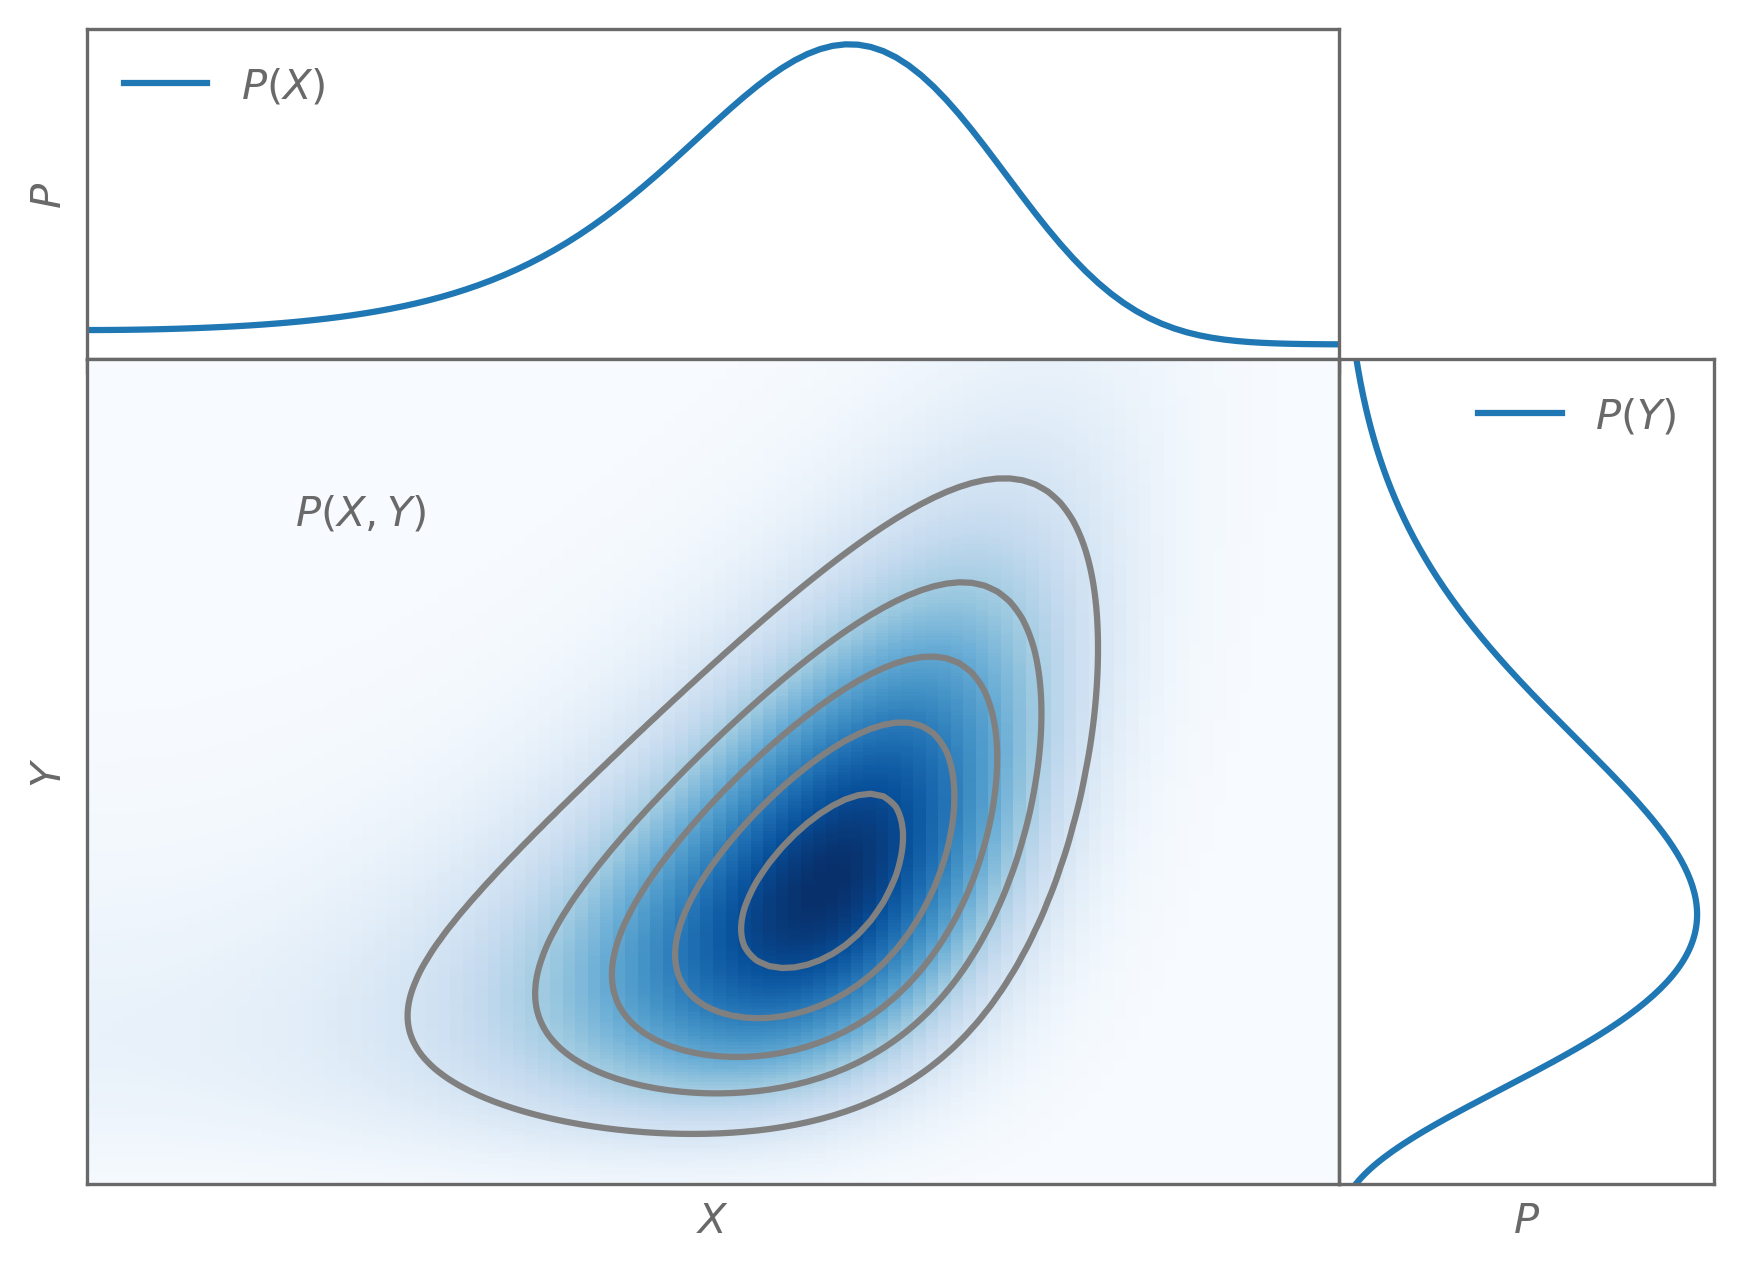

In [35]:
def make_2d_distr(n, cond_x, cond_y):
    chi2 = scipy.stats.gamma(loc=-4, a=4)
    rho = 0.8
    sigma_x = 2
    sigma_y = 3.5
    normal = scipy.stats.multivariate_normal(
        mean=[3.5, 0],
        cov=np.array([[sigma_x**2, sigma_x*sigma_y*rho],
                      [sigma_x*sigma_y*rho, sigma_y**2]])
    )
    x_range = (0, 3)
    y_range = (-3.5, 4)
    x = np.linspace(*x_range, n)
    y = np.linspace(*y_range, int((y_range[1]-y_range[0])/(x_range[1]-x_range[0])*n))
    pos = np.dstack(np.meshgrid(x**2, y))
    grid = normal.pdf(pos)
    # grid = np.ones((x.size, y.size)).T
    grid *= chi2.pdf(y)[:, None]

    dx = (x[1]-x[0])
    dy = (y[1]-y[0])
    grid /= grid.sum()*dx*dy

    x_marg = np.sum(grid, axis=0)*dy
    y_marg = np.sum(grid, axis=1)*dx

    x_cond_idx = np.searchsorted(x, cond_x)
    y_cond_idx = np.searchsorted(y, cond_y)

    y_cond = grid[:,x_cond_idx]/x_marg[x_cond_idx]
    x_cond = grid[y_cond_idx]/y_marg[y_cond_idx]

    return grid, x_marg, y_marg, x_cond, y_cond, x, y, x_range, y_range

grid, x_marg, y_marg, x_cond, y_cond, x, y, x_range, y_range = make_2d_distr(100, cond_x=1.5, cond_y=-2)

def make_joint_plot(grid, x, y, x_range, y_range):
    fig, ax = plt.subplots(
        2, 2, sharex="col", sharey="row",
        figsize=(7, 5),
        gridspec_kw=dict(
            width_ratios=[1, 0.3], height_ratios=[0.4, 1.0],
            wspace=0, hspace=0
        )
    )

    ax[1,0].contour(x, y, grid, origin="lower", extent=x_range+y_range, levels=5, colors="grey")
    ax[1,0].imshow(grid, origin="lower", extent=x_range+y_range, cmap="Blues")
    ax[1,0].set_aspect("auto")
    ax[0,1].axis("off")

    ax[0,0].tick_params(labelleft=False, left=False)
    ax[1,0].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
    ax[1,1].tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

    ax[1,0].set_xlabel("$X$")
    ax[1,0].set_ylabel("$Y$")
    ax[1,0].text(0.5, 2.5, "$P(X,Y)$")

    return fig, ax

fig, ax = make_joint_plot(grid, x, y, x_range, y_range)

ax[0,0].plot(x, x_marg, c="C0", label="$P(X)$")
ax[1,1].plot(y_marg, y, c="C0", label="$P(Y)$")

ax[0,0].set_ylabel("$P$")
ax[1,1].set_xlabel("$P$")

ax[0,0].legend(frameon=False, loc="upper left")
ax[1,1].legend(frameon=False);

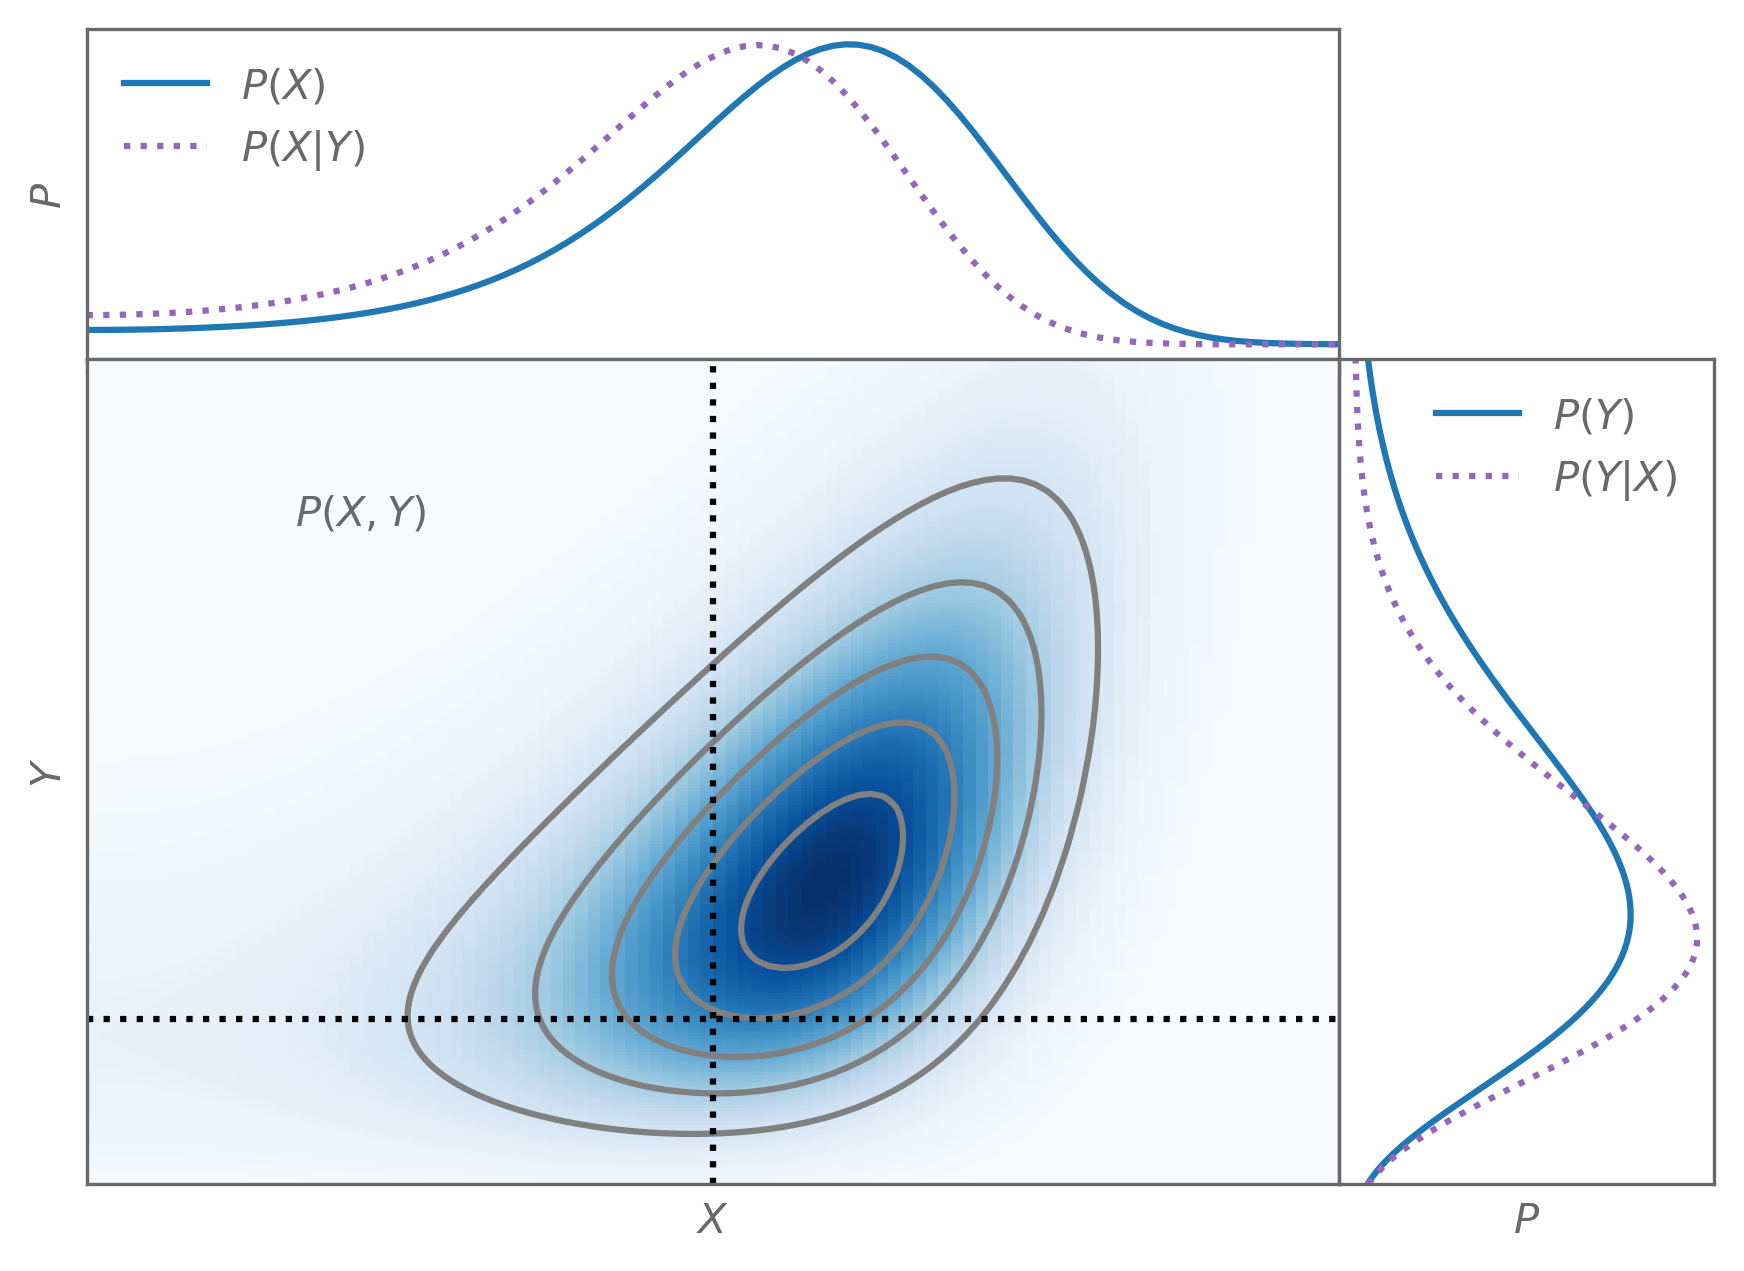

In [36]:
fig, ax = make_joint_plot(grid, x, y, x_range, y_range)

ax[0,0].plot(x, x_marg, c="C0", label="$P(X)$")
ax[1,1].plot(y_marg, y, c="C0", label="$P(Y)$")

ax[0,0].plot(x, x_cond, c="C4", ls=":", label="$P(X|Y)$")
ax[1,1].plot(y_cond, y, c="C4", ls=":", label="$P(Y|X)$")

ax[1,0].axhline(y=-2, c="k", ls=":")
ax[1,0].axvline(x=1.5, c="k", ls=":")

ax[0,0].set_ylabel("$P$")
ax[1,1].set_xlabel("$P$")

ax[0,0].legend(frameon=False, loc="upper left")
ax[1,1].legend(frameon=False);

### Change of variables

In the multivariate case, $\vec y = g(\vec x)$ and $g : \mathbb{R}^n \rightarrow \mathbb{R}^n$.

The PDF $f_{Y}(\vec y)$ is given by

\begin{equation}
    f_{Y}(\vec y) = f_X\left(g^{-1}(\vec y)\right)|J|
\end{equation}

where $|J|$ is the determinant of the Jacobian of $g^{-1}(\vec y)$

$$
    J_{ij} = \frac{\partial g^{-1}_i(\vec y)}{\partial y_j}
$$

The deep learning method of normalising flows is based on this formula.

## Common probability distributions


### Uniform

$$
p(x) = \begin{cases}
    \frac{1}{b-a} &x\in[a,b] \\
    0 &\text{otherwise}
\end{cases}
$$
- Parameters:
    - $a$: lower bound
    - $b$: upper bound
- Symbol: $X\sim\Uniform(a, b)$
- Mean: $\frac{a+b}{2}$
- Variance: $\frac{(b-a)^2}{12}$

### Binomial

Consider an experiment that can have two outcomes: success and failure, with probability of success being $p$ and failure being $q=1-p$. 

The binomial distribution gives the probability of having success $k$ times in $n$ independent trials:

$$
\Pr(X=k) = \binom{n}{k}p^k(1-p)^{n-k}
$$
- Parameters:
    - $p$: probability of success
    - $n$: number of trials
- Mean: $\E[X]=np$
- Variance: $\Var[X]=np(1-p)$

As $n\to\infty$, with $p$ fixed, the binomial distribution approaches a normal distribution.

As $n\to\infty$, with $np$ fixed, the binomial distribution approaches a Poisson distribution.

### Multinomial

Instead of only having two outcomes, consider an experiment that can have $k$ outcomes with probabilities $p_1,\dots,p_k$, $\sum_i p_i = 1$.

The multinomial distribution gives the probability that in $n$ trials, outcome $i\in\{1,\dots,k\}$ occurred $x_i$ times. Each trial only has one outcome, so $\sum_i x_i = n$. 

$$
\Pr(X=x_1,\dots,x_k) = \frac{n!}{x_1!\dots x_k!}p_1^{x_1}\dots p_k^{x_k}
$$
- Parameters:
    - $p_i$: probabilities of outcomes $i\in\{1,\dots,k\}$
    - $n$: number of trials
- Mean: $\E[X_i] = n p_i$
- Covariance: $\Cov[X_i, X_j] = \delta_{ij}n p_i - n p_i p_j$

### Poisson

The Poisson distribution gives the probability of $k$ (independent) events happening in a time interval, with expected rate $\lambda$.

$$
\Pr(X=k) = \frac{\lambda^k}{k!}\ee^{-\lambda}
$$
- Parameter:
    - $\lambda$: event rate
- Mean: $\lambda$
- Variance: $\lambda$

The Poisson distribution appears commonly when events are rare and independent. Examples are decay of nuclei, arrival of photons in telescopes. 
Note that the interval for which the rate is defined does not need to be a time interval, it can also be spatial. 

As $\lambda\to\infty$, the Poisson distribution approaches a normal distribution.

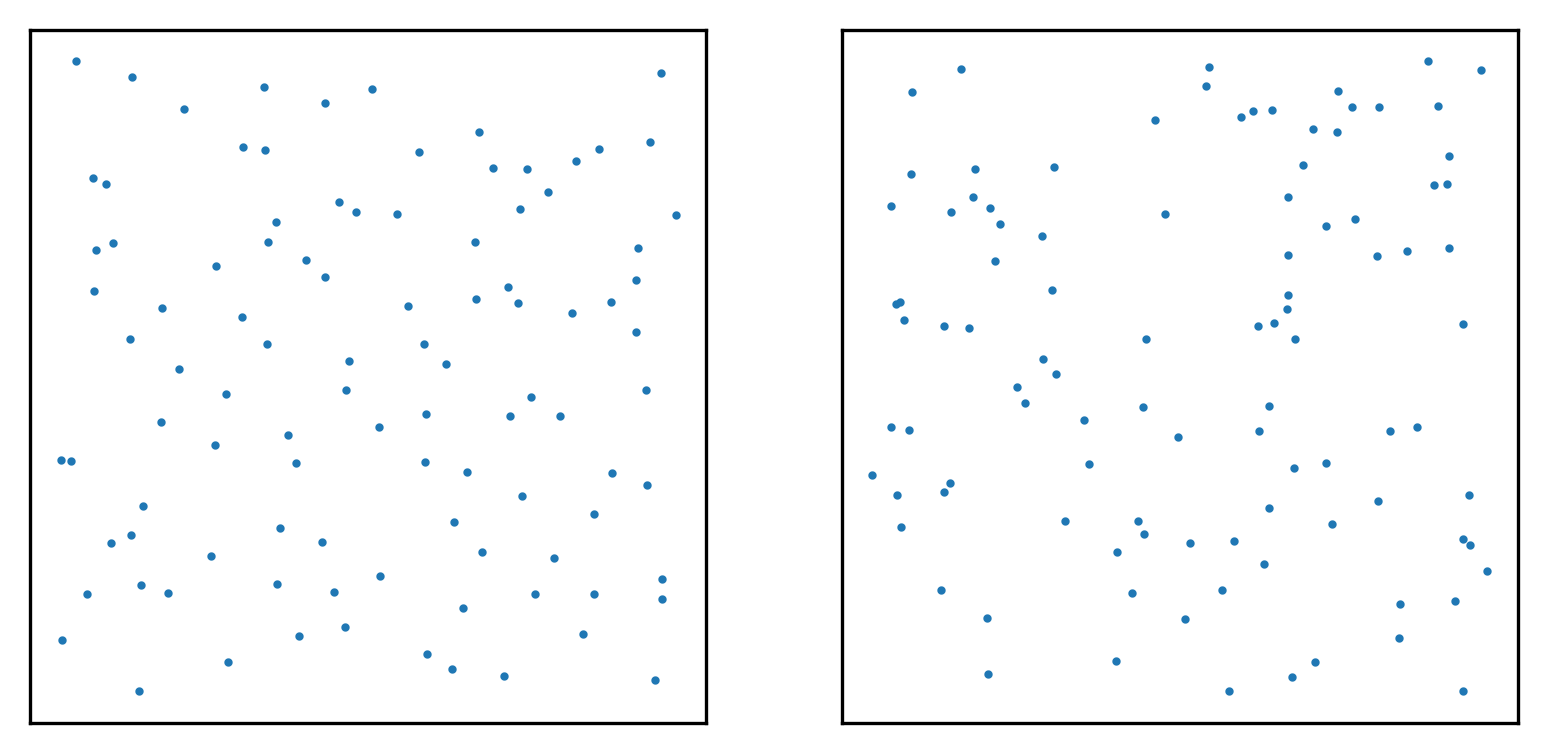

In [3]:
n = 10
fig, ax = plt.subplots(1, 2)

points = np.dstack(np.meshgrid(np.linspace(0, 1, n),  np.linspace(0, 1, n))).reshape(-1, 2)
points += np.random.normal(size=(n**2, 2))*0.04

points_poisson = np.random.uniform(size=points.shape)

ax[0].scatter(*points.T, s=1)
ax[1].scatter(*points_poisson.T, s=1)

ax[0].set_aspect("equal")
ax[1].set_aspect("equal")

ax[0].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
ax[1].tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)

fig.dpi = 300;


### Exercises

- Confirm by simulation that the probability of $k$ out of $n$ iid $X_i\sim\Uniform(0,1)$ being in a small interval $\Delta x$ follows a Poisson distribution.
- Derive the Poisson distribution from the binomial distribution.


### Normal

Also called Gaussian distribution. If there is only one distribution you need to remember, it is this one. It appears *everywhere*, and has many fascinating properties.

$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\ee^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
- Parameters:
    - $\mu$: mean
    - $\sigma^2$: variance
- Symbol: $X\sim\Norm(\mu, \sigma^2)$
- Mean: $\mu$
- Variance: $\sigma^2$

Some properties:
- Sums of Gaussian RVs are Gaussian
- Jointly Gaussian RVs that are uncorrelated are independent. This is not true in general!
- Sample mean and sample variance are independent
- For a given mean and variance, the normal distribution is the distribution with the highest entropy
 


### Multivariate normal

Multivariate generalisation of the normal distribution. Let $\vec x \in \mathbb{R}^n$, then
$$
p(\vec x) = \frac{1}{(2\pi)^\frac{n}{2}\det\Sigma}\exp\left(-\frac{1}{2}(\vec x - \vec\mu)^T\Sigma^{-1}(\vec x - \vec\mu)\right)
$$
- Parameters:
    - $\vec\mu$: mean
    - $\Sigma$: covariance
- Symbol: $\vec X\sim \Norm(\vec\mu, \Sigma)$
- Mean: $\vec\mu$
- Covariance: $\Sigma$, positive definite symmetric matrix


### Chi-squared

The square of a normally distributed RV $X \sim \Norm(0, 1)$ is chi-squared distributed with 1 degree of freedom. 

The sum of the squares of $n$ iid $X_i \sim \Norm(0, 1)$ is chi-squared distributed with $n$ degrees of freedom: $\sum_i^n X_i^2 \sim \chi^2_n$

The pdf of the chi-squared distribution with $\nu$ degrees of freedom is
$$
p(x) = \frac{1}{2^\frac{\nu}{2}\Gamma(\frac{\nu}{2})}x^{\frac{\nu}{2}-1}\ee^{-\frac{x}{2}}
$$
- Parameter:
    - $\nu$: number of degrees of freedom
- Symbol: $\chi^2_\nu$
- Mean: $\nu$
- Variance: $2\nu$

Approaches a normal distribution for large $\nu$.

An important application is that for a $n$-dimensional multivariate RV $\vec X\sim\Norm(\vec\mu, \Sigma)$, we have

$$(\vec X - \vec\mu)^T\Sigma^{-1}(\vec X - \vec\mu)\sim\chi^2_{n}$$

We will come back to this when we look at the goodness of fit in Gaussian likelihoods.

### Cauchy

The Cauchy distribution comes up occationally and sets itself apart by how pathological it is. 
The PDF looks innocuous but it has no defined mean or variance.
$$
    p(x) = \frac{1}{\pi\gamma\left(1+\frac{(x-x_0)^2}{\gamma}\right)}
$$
- Parameters:
    - $x_0$: location
    - $\gamma$: scale
- Mean: undefined!
- Variance: undefined!


### Power law

Scale invariance is a property that is common in the physical sciences. Consider the function $f(x) = a x^{-k}$. The function does not change it shape when scaling the argument, it is scale invariant: 
$$
    f(cx) = c^{-k} f(x)\propto f(x)\ .
$$


Depending on the exponent, such function cannot be a probability distribution. In practice, there are physical lower and/or upper limits that make the distribution well-defined. 
The PDF is
$$
    f(x) = 
        \begin{cases}
            \frac{1-\alpha}{b^{1-\alpha} - a^{1-\alpha}} x^{-\alpha} & a \leq x \leq b \\
            0 &\text{otherwise}
        \end{cases}\ ,
$$
with CDF
$$
    F(x) = 
        \begin{cases}
            0 &x < a \\
            \frac{1}{b^{1-\alpha} - a^{1-\alpha}} \left(x^{1-\alpha} -  a^{1-\alpha}\right) & a \leq x \leq b \\
            1 & x > b
        \end{cases}\ .
$$
- Parameters:
    - $a$, $b$: lower and upper limits
    - $\alpha$: power low exponent

The mean and variance are formally defined for appropriate lower/upper limits and exponents. They are usually poor descriptors for the distribution, however. For steep power laws, these distributions can behave quite unintuitively.

## Central limit theorem

One reason the normal distribution is so ubiquitous is the central limit theorem:

The mean $\bar X_n = \frac{X_1 + \dots + X_n}{n}$ of $n$ iid RVs with $\E[X_i]=\mu$ and $\Var[X_i]=\sigma^2 <\infty$ tends to a normal distribution. 
$$
\sqrt{n}\frac{\bar X_n - \mu}{\sigma} \xrightarrow{d} \Norm(0, 1)\quad(n\to\infty)
$$


In [9]:
def get_samples(n, base_distr, n_sample=50000):
    samples = base_distr.rvs(size=(n, n_sample)).mean(axis=0)
    samples = (samples - base_distr.mean())/base_distr.std()*np.sqrt(n)
    return samples

fig, ax = plt.subplots(1, 1)
fig.subplots_adjust(top=0.9, bottom=0.2)

x = np.linspace(-5, 5, 100)

base_distr = scipy.stats.chi2(df=2)
samples = get_samples(n=1, base_distr=base_distr)

# ax.plot([], [], ls="none", label=r"$X_i\sim \chi^2_{\nu=2},\, i=1,\dots,n$")
ax.set_title(r"$X_i\sim \chi^2_{\nu=2},\, i=1,\dots,n$")
_, bins, hist_container = ax.hist(
    samples, bins=np.linspace(-5, 5, 50), density=True,
    facecolor="C0", alpha=0.7,
    label=r"$\frac{\sqrt{n}(\bar X_n - \mu)}{\sigma}$"
)
ax.plot(x, scipy.stats.norm().pdf(x), c="grey", label=r"$\mathcal{N}(0,1)$")

ax.set_xlim(-5, 5)
ax.set_ylim(top=0.65)
ax.legend(frameon=False, loc=(0.65, 0.7), fontsize="x-large")
counter = ax.text(2.8, 0.4, f"$n={1}$", fontsize="x-large")

ax.set_xlabel(r"$\bar X_n = \frac{1}{n}\sum_i^n X_i$")
ax.set_ylabel("$P$")

def update(i):
    samples = get_samples(n=i, base_distr=base_distr)
    n, _ = np.histogram(samples, bins)
    n = n/(n.sum()*(bins[1]-bins[0]))
    for count, rect in zip(n, hist_container.patches):
        rect.set_height(count)
    counter.set_text(f"$n={i}$")
    return hist_container.patches

ani = FuncAnimation(
    fig, update, np.unique(np.geomspace(1, 1000, 50, dtype=int)),
    repeat=False, blit=True, interval=400
)
plt.close()
HTML(ani.to_jshtml())


- The CLT can be generalised for non-iid random variables in certain cases but care needs to be taken when trying to apply it to non-iid data.

- The "limit" part in the CLT is important - for finite $n$ (which is always the case for real data) the distribution of the mean might not have sufficiently converged.

## Exercises

- Make plots of the PDFs of the distributions we covered so far, varying their parameters
- Compute the distribution of the sum of two independent Gaussian RVs.
- What is the distribution of the sum of two independent RVs $X\sim f$ and $Y\sim g$?
- Derive the PDF of the $\chi^2_{\nu=1}$ distribution
- Bonus:
    - What is the product of two independent RVs $U$ and $V$?
    - Compute the distribution of the ratio of two Gaussian RVs.
